In [1]:
import pandas as pd

# Define the file paths for the four CSV files
file1 = '/Users/keerthanabandi/Desktop/Semester - 2/Social Media Mining/paper 3/data/reddit_data_128vpjv.csv'
file2 = '/Users/keerthanabandi/Desktop/Semester - 2/Social Media Mining/paper 3/data/reddit_data_124dg1y.csv'
file3 = '/Users/keerthanabandi/Desktop/Semester - 2/Social Media Mining/paper 3/data/reddit_data_126mjlb.csv'
file4 = '/Users/keerthanabandi/Desktop/Semester - 2/Social Media Mining/paper 3/data/reddit_data_124otcv.csv'

# Read in the four CSV files using pandas
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)
df4 = pd.read_csv(file4)

# Merge the four dataframes into one
merged_df = pd.concat([df1, df2, df3, df4], axis=0)

# Drop any duplicates in the merged dataframe
merged_df = merged_df.drop_duplicates()

# Write the merged dataframe to a new CSV file
merged_df.to_csv('/Users/keerthanabandi/Desktop/Semester - 2/Social Media Mining/paper 3/data/total_comments.csv', index=False)


In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(nltk.corpus.stopwords.words('english'))

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    if pd.isnull(text) :  # Check if text is NaN
        return ''
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs using regular expressions
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    # Remove punctuations and numbers
    text = re.sub(r"[^a-zA-Z]+", " ", text)
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    # Join tokens back into a string
    text = " ".join(tokens)
    return text

# Define the path to your input CSV file
input_file = "/Users/keerthanabandi/Desktop/Semester - 2/Social Media Mining/paper 3/data/total_comments.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(input_file)

# Remove comments that are deleted or removed
df = df[(df['comment'] != '[removed]') & (df['comment'] != '[deleted]') & (df['author'] != '[deleted]')]

# Apply preprocessing to the 'text' column
df['comment'] = df['comment'].apply(preprocess_text)

# Drop duplicates
df.drop_duplicates(subset=['comment'], keep='first', inplace=True)

# Define the path for the output CSV file
output_file = "/Users/keerthanabandi/Desktop/Semester - 2/Social Media Mining/paper 3/data/total_comments_preprocessing.csv"

# Save the preprocessed DataFrame to a new CSV file
df.to_csv(output_file, index=False)

print("Preprocessing complete. Saved preprocessed data to", output_file)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/keerthanabandi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/keerthanabandi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Preprocessing complete. Saved preprocessed data to /Users/keerthanabandi/Desktop/Semester - 2/Social Media Mining/paper 3/data/total_comments_preprocessing.csv


In [3]:
import csv
import empath

# Open the input CSV file
with open('total_comments_preprocessing.csv', mode='r', encoding='utf-8') as input_file:

    # Create a CSV reader object for the input file
    reader = csv.DictReader(input_file)

    # Open the output CSV file
    with open('sentiment_analysis.csv', mode='w', encoding='utf-8', newline='') as output_file:

        # Define the fieldnames for the output CSV file
        fieldnames = reader.fieldnames + ['positive_score', 'negative_score', 'neutral_score', 'emotion']

        # Create a CSV writer object for the output file
        writer = csv.DictWriter(output_file, fieldnames=fieldnames)

        # Write the header row to the output file
        writer.writeheader()

        # Create an instance of the Empath class
        empath_analyzer = empath.Empath()

        # Iterate through each row in the input file
        for row in reader:

            # Analyze the sentiment of the comment using Empath
            sentiment = empath_analyzer.analyze(row['comment'], categories=['positive_emotion', 'negative_emotion', 'neutral_emotion'])

            # Add the sentiment scores to the row dictionary
            row['positive_score'] = sentiment['positive_emotion']
            row['negative_score'] = sentiment['negative_emotion']
            row['neutral_score'] = sentiment['neutral_emotion']

            # Determine the most relevant emotion for the comment
            if sentiment['positive_emotion'] > sentiment['negative_emotion'] and sentiment['positive_emotion'] > sentiment['neutral_emotion']:
                row['emotion'] = 'positive'
            elif sentiment['negative_emotion'] > sentiment['positive_emotion'] and sentiment['negative_emotion'] > sentiment['neutral_emotion']:
                row['emotion'] = 'negative'
            else:
                row['emotion'] = 'neutral'

            # Write the row to the output file
            writer.writerow(row)


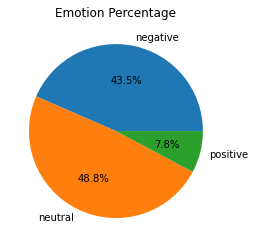

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# read the CSV file
df = pd.read_csv('sentiment_analysis.csv')

# group by emotion and sum the scores
emotion_counts = df.groupby('emotion').sum()

# create a pie chart
plt.pie(emotion_counts['score'], labels=emotion_counts.index, autopct='%1.1f%%')

# set the title
plt.title('Emotion Percentage')

# display the chart
plt.show()


In [5]:
# create an instance of the empath library
empath_analyzer = empath.Empath()

# read the CSV file
df = pd.read_csv('total_comments_preprocessing.csv')

# define a list of relevant emotions
relevant_emotions = ['positive','negative','sadness', 'depression','dread', 'anxiety', 'horror','fear','love', 'hope','trust', 'surprise', 'boredom','pain','aggression','disgust']

# add columns for each relevant emotion
for emotion in relevant_emotions:
    df[emotion] = 0

# loop through each comment and analyze the emotions
for i, row in df.iterrows():
    comment = row['comment']
    if isinstance(comment, str):
        emotions = empath_analyzer.analyze(comment, categories=relevant_emotions)
        for emotion in relevant_emotions:
            df.loc[i, emotion] = emotions[emotion]

# add a column for the dominant emotion
def get_dominant_emotion(row):
    max_score = max(row[relevant_emotions])
    if max_score == 0:
        return 'neutral'
    else:
        return relevant_emotions[row[relevant_emotions].tolist().index(max_score)]

df['dominant_emotion'] = df.apply(get_dominant_emotion, axis=1)

# save the updated DataFrame to a new CSV file
df.to_csv('nashville_sentiment_analysis.csv', index=False)


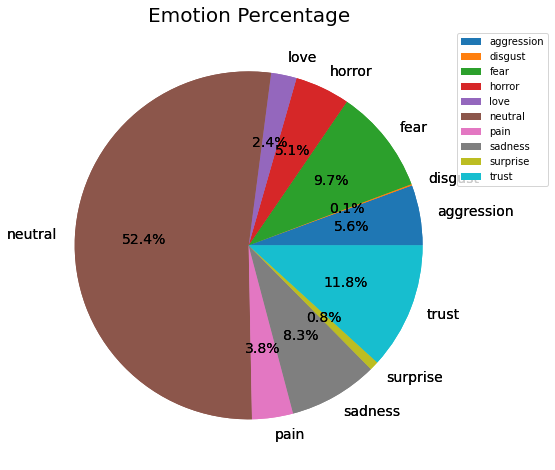

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# read the CSV file
df = pd.read_csv('nashville_sentiment_analysis.csv')

# group by emotion and sum the scores
emotion_counts = df.groupby('dominant_emotion').sum()
# create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(emotion_counts['score'], labels=emotion_counts.index, autopct='%1.1f%%', textprops={'fontsize': 14})

# add legend
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))

# set the title
plt.title('Emotion Percentage', fontsize=20)


ax.pie(emotion_counts['score'], labels=emotion_counts.index, autopct='%1.1f%%', textprops={'fontsize': 14})

# display the chart
plt.show()


In [7]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('total_comments_preprocessing.csv')

# Convert comment column to string type
df['comment'] = df['comment'].astype(str)

# Preprocess the text data
stop_words = ['a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'what', 'which', 'this', 'that', 'these', 'those', 'then', 'just', 'so', 'than', 'such', 'both', 'through', 'about', 'for', 'with', 'without', 'within', 'between', 'into', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now','is','on','of','would'] # define your stop words
processed_comments = []
for comment in df['comment']:
    processed_comment = simple_preprocess(comment)
    processed_comment = [word for word in processed_comment if word not in stop_words]
    processed_comments.append(processed_comment)

# Create a dictionary and bag-of-words corpus from the preprocessed comments
dictionary = Dictionary(processed_comments)
bow_corpus = [dictionary.doc2bow(comment) for comment in processed_comments]

# Train the LDA model on the corpus
num_topics = 5  # define thex number of topics to find
lda_model = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=10)
lda_model.save('lda_model')

# Print the top 10 words for each topic
for idx, topic in lda_model.print_topics(num_topics=num_topics, num_words=10):
    print(f'Topic: {idx}')
    print(f'Words: {topic}\n')


Topic: 0
Words: 0.018*"people" + 0.016*"trans" + 0.006*"way" + 0.005*"say" + 0.005*"mental" + 0.005*"one" + 0.005*"want" + 0.005*"person" + 0.004*"reason" + 0.004*"guns"

Topic: 1
Words: 0.018*"gun" + 0.013*"guns" + 0.009*"us" + 0.009*"people" + 0.009*"shootings" + 0.006*"news" + 0.006*"like" + 0.006*"school" + 0.006*"mass" + 0.006*"countries"

Topic: 2
Words: 0.016*"school" + 0.015*"people" + 0.012*"hate" + 0.009*"like" + 0.008*"shooter" + 0.008*"crime" + 0.008*"think" + 0.008*"gun" + 0.007*"christian" + 0.006*"one"

Topic: 3
Words: 0.015*"people" + 0.007*"like" + 0.007*"one" + 0.006*"guns" + 0.006*"school" + 0.005*"mental" + 0.005*"problem" + 0.005*"get" + 0.004*"shootings" + 0.004*"health"

Topic: 4
Words: 0.014*"people" + 0.007*"school" + 0.007*"think" + 0.007*"shooter" + 0.006*"want" + 0.006*"like" + 0.006*"know" + 0.006*"news" + 0.005*"shooting" + 0.005*"manifesto"



In [23]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Create the visualization
vis = gensimvis.prepare(lda_model, bow_corpus, dictionary)

# Display the visualization
pyLDAvis.display(vis)

In [24]:
import re

# Get the top words for each topic and count their occurrences
# Get the top words for each topic and count their occurrences
word_counts = {}
for i, topic in lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False):
    word_counts[f'Topic {i}'] = {}
    for word, count in topic:
        word = re.sub('[^a-zA-Z]+', '', word)
        if word not in stop_words:
            word_counts[f'Topic {i}'][word] = count

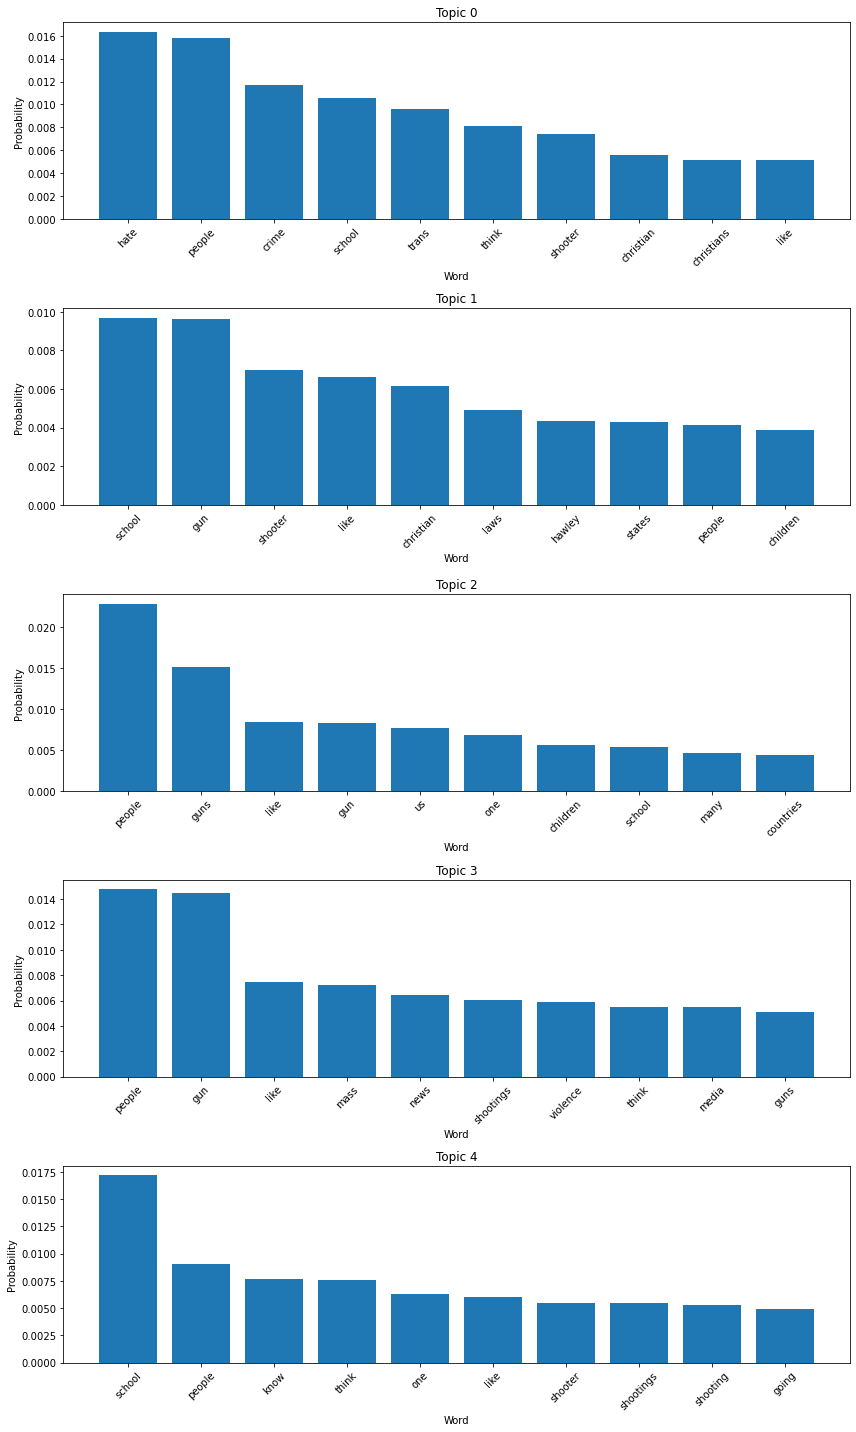

In [25]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 1, figsize=(12, 20))

# Flatten the axs array to iterate through each subplot
axs = axs.flatten()

# Create a bar chart for each topic
for i, (topic, word_count) in enumerate(word_counts.items()):
    axs[i].bar(word_count.keys(), word_count.values())
    axs[i].set_title(topic)
    axs[i].set_xlabel('Word')
    axs[i].set_ylabel('Probability')
    axs[i].tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()


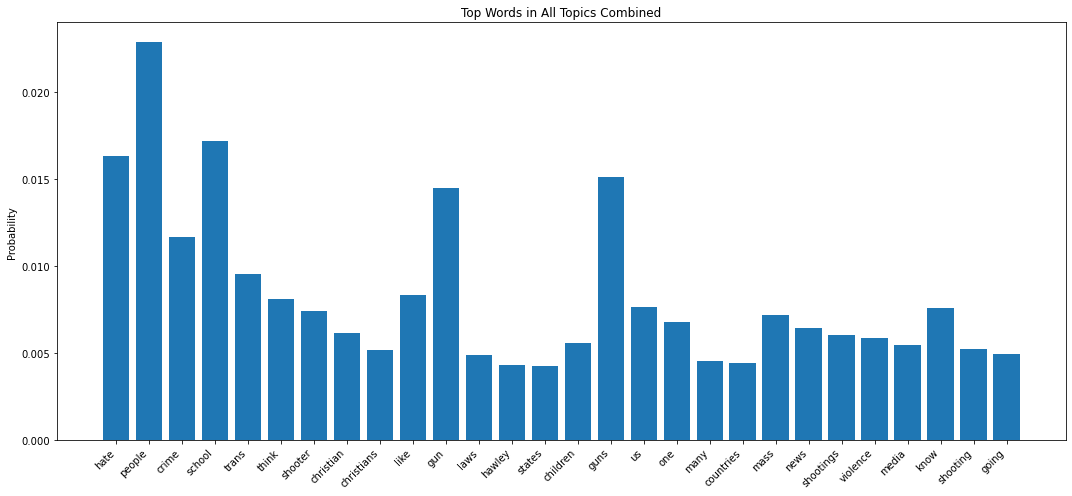

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_top_words(lda_model, num_words=10):
    top_words = lda_model.show_topics(num_topics=-1, num_words=num_words, formatted=False)
    words = []
    probs = []
    for i, topic in top_words:
        for word, prob in topic:
            words.append(word)
            probs.append(prob)
    df = pd.DataFrame({'Word': words, 'Probability': probs})
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.set_title(f"Top Words in All Topics Combined")
    ax.set_ylabel("Probability")
    ax.bar(df['Word'], df['Probability'])
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
plot_top_words(lda_model, num_words=10)

Mean: 168.38
Median: 94.00
Standard deviation: 234.79
1st percentile: 4.00
99th percentile: 1076.64


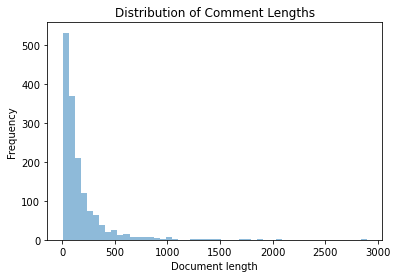

In [28]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

df = pd.read_csv('total_comments_preprocessing.csv')

# Extract the text data column to create a list of texts

df = df.dropna(subset=['comment'])

# or replace null values with an empty string
df['comment'] = df['comment'].fillna('')
texts = df['comment'].tolist()

doc_lens = [len(doc) for doc in texts]

print(f"Mean: {np.mean(doc_lens):.2f}")
print(f"Median: {np.median(doc_lens):.2f}")
print(f"Standard deviation: {np.std(doc_lens):.2f}")
print(f"1st percentile: {np.quantile(doc_lens, 0.01):.2f}")
print(f"99th percentile: {np.quantile(doc_lens, 0.99):.2f}")

plt.hist(doc_lens, bins=50, alpha=0.5)
plt.xlabel('Document length')
plt.ylabel('Frequency')
plt.title('Distribution of Comment Lengths')
plt.show()


In [13]:
import pandas as pd
from collections import Counter

df = pd.read_csv('total_comments_preprocessing.csv')

# Combine all comments into a single string
all_comments = ' '.join(df['comment'].astype(str).values.tolist())


# Split the combined string into individual words
words = all_comments.split()

# Count the frequency of each word
word_freq = Counter(words)

# Get the top 10 most frequent words
top_10_words = word_freq.most_common(10)

print(top_10_words)


[('people', 599), ('school', 390), ('gun', 300), ('like', 288), ('would', 267), ('guns', 259), ('think', 238), ('one', 220), ('hate', 219), ('shooter', 218)]


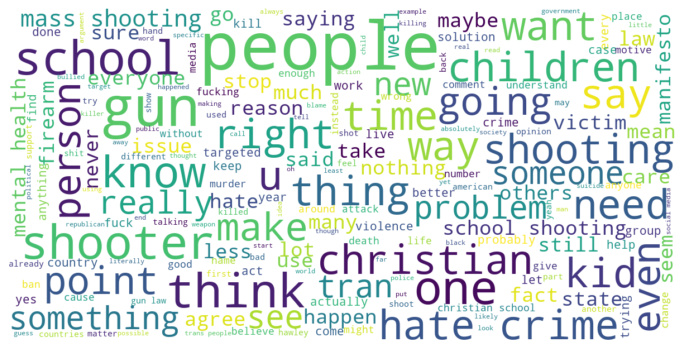

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv('total_comments_preprocessing.csv')

# Drop rows with null values
df = df.dropna(subset=['comment'])

# or replace null values with an empty string
df['comment'] = df['comment'].fillna('')


all_titles = ' '.join(df['comment'])
wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=40, scale=3,
                      random_state=42).generate(all_titles)


# Plot the wordcloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()